# Lab: Neural networks

## Exercise 3

> Re-use the code of exercise 2 (two layer-NN).

> Up untill now, no bias parameter was used, in this exercise you will add a bias parameter. $\sigma(x.w +b)$

> Make sure the bias parameter is also updated using gradient descent (**you will need to calculate $\frac{\partial L}{\partial b}$**)


Name: Benjamin Fraeyman

#### Imports

In [1]:
import numpy as np
import matplotlib.pylab as plt
from NN_Helper import Gradient_Checker
gradient_checker = Gradient_Checker(limit=1.0*np.exp(-8))

#### Create toy dataset


In [2]:
# Set containing samples with features
X = np.array([  [0.,0.,1.,0.],
                [0.,1.,1.,0.],
                [1.,0.,1.,0.],
                [1.,1.,1.,0.],
                [0.,0.,1.,1.],
                [0.,1.,1.,1.]])

# Ground truth
y = np.array([  [1.,0.,0.],
                [1.,0.,0.],
                [0.,1.,0.],
                [0.,1.,0.],
                [0.,0.,1.],
                [0.,0.,1.]])

n_samples = float(len(X))

#### Initialize weight matrix

In [3]:
# seed random numbers to make calculation
# deterministic (just a good practice)
np.random.seed(1)

# initialize weights randomly with mean 0
w1 = 2*np.random.random((4,20)) - 1
w2 = 2*np.random.random((20,3)) - 1

# initialize the bias for every layer
b1 = np.zeros((1,20))
b2 = np.zeros((1,3))

#### Activiation function and the derivative of this function 

In [4]:
# Sigmoid function
def sigmoid(x):
        output = 1/(1+np.exp(-x))
        return output
    
# Derivative of the sigmoid function
def sigmoid_output_to_derivative(output):
        return output*(1-output)

#### Forward propagation

In [5]:
#re-use the forward propagation function you wrote in the previous exercise
#update it to use a bias
def forward(input_layer=None,weights=None,bias=None):
    p = np.dot(input_layer,weights) +bias
    a = sigmoid(p)
    return a

# https://stackoverflow.com/questions/2480650/role-of-bias-in-neural-networks

#### Backpropagation

In [6]:
#re-use the backpropagation function you wrote in the previous exercise 
#update it to also return the gradient of the loss function
#with respect to the bias
#https://mattmazur.com/2015/03/17/a-step-by-step-backpropagation-example/

def backwards(input_layer=None,weights=None, a=None, dlda=None):
    dadp = sigmoid_output_to_derivative(a)
    dpdw = input_layer.T
    dldw = np.dot(dpdw,dlda*dadp)
    
    #dz = dlda*(1-dlda)
    #dldb = np.sum(dz, axis=0, keepdims=True)
    # (a+w) afgeleid naar w => 1
    #btemp = np.zeros((1,weights.shape[1]))
    dldp = dlda*dadp
    ones = np.ones((1, int(n_samples)))
    #ones = np.ones((1, 6))
    #ones.T
    dldb = np.dot(ones,dldp)#dldp)
    
    dpdx = weights.T
    dldx = np.dot(dlda*dadp, dpdx)
    
    
    dldw /= n_samples
    dldb /= n_samples
    return dldw,dldb,dldx

#should return:
#Gradient of the loss with respect to the weights - dldw
#Gradient of the loss with respect to the bias - dldb
#Gradient of the loss with respect to the input of the layer - dldx

#### Loss function

In [7]:
#re-use the loss function you wrote in the previous exercise
def squared_loss(predicted=None,target=None):
    loss = 0.5*np.sum((predicted-target)**2)
    loss /= n_samples
    return loss

**Derivative of the loss function**

In [8]:
#re-use the function to calculate the derivative of the loss function
def squared_loss_derrivative(predicted=None,target=None):
        dlda = predicted-target
        return dlda

#### Main function

> In the main function the gradient check is also executed. 
> The difference between the analytical gradient and numerical gradient should be smaller than 1.0 e^-8

In [9]:
# A list to store the loss per epoch in. We can plot this later on to see if the network learns something
loss_list=[]

# How many times we will do the combination of forward and backward propagation
n_epoch = 60000

#learning rate
learning_rate = 0.01

for iter in xrange(n_epoch):
    #Use the forwards and backwards function to create a two layer neural network 
    #wherein each layer uses a bias (b1 and b2 respectively)
    #Again make sure to calculate dldx, which is the gradient of the loss function with respect to the input of the network
    
    a1 = forward(input_layer=X,weights=w1,bias=b1)
    a2 = forward(input_layer=a1,weights=w2,bias=b2)
    
    #Calculate the loss and add it to the loss_list
    loss_list.append(squared_loss(predicted=a2,target=y))
    
    dldw2, dldb2, dldx2 = backwards(input_layer= a1,weights=w2, a=a2, dlda = squared_loss_derrivative(predicted=a2,target=y))
    dldw, dldb, dldx = backwards(input_layer= X,weights=w1, a=a1, dlda = dldx2/n_samples)

    
    # Gradient check.
    if iter % 10000 == 0.:
        f = lambda x: squared_loss(target=y,predicted=forward(input_layer=forward(input_layer=X,weights=w1,bias=b1),weights=w2,bias=b2))
        gradient_checker.gradient_check(X,y,dldx,f)
        
    #Do not forget to update the weights using the gradient descent update rule
    w1 += -learning_rate*dldw
    w2 += -learning_rate*dldw2
    
    #Also update the bias using the gradient descent update rule
    b1 += -learning_rate*dldb
    b2 += -learning_rate*dldb2

Good gradient, difference is: 1.05410532970701e-09
Good gradient, difference is: 6.374744492508185e-10
Good gradient, difference is: 1.7406645911953918e-09
Good gradient, difference is: 8.361300323349188e-10
Good gradient, difference is: 1.6063379760479847e-09
Good gradient, difference is: 3.3122433150420643e-09


In [10]:
print "Output After Training:"
print
print "The output of the network"
print
print a2
print
print "The ground truth:"
print
print y
print
print
print "Apply argmax on the output to get the index per row where the value is maximum"
print
print "Prediction network"
print
print np.argmax(a2,axis=1)
print
print "Ground truth"
print
print np.argmax(y,axis=1)

Output After Training:

The output of the network

[[0.84247073 0.09805121 0.11035624]
 [0.86516512 0.10291533 0.07693742]
 [0.09428171 0.89763911 0.0260825 ]
 [0.12038181 0.88921355 0.02208068]
 [0.09446223 0.01717599 0.92002539]
 [0.10240357 0.01953083 0.89414585]]

The ground truth:

[[1. 0. 0.]
 [1. 0. 0.]
 [0. 1. 0.]
 [0. 1. 0.]
 [0. 0. 1.]
 [0. 0. 1.]]


Apply argmax on the output to get the index per row where the value is maximum

Prediction network

[0 0 1 1 2 2]

Ground truth

[0 0 1 1 2 2]


#### Plot the loss

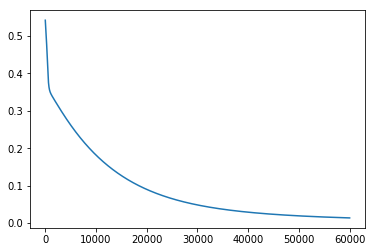

In [11]:
plt.plot(loss_list)
plt.show()